In [1]:
import os  # Import the 'os' module, which allows interaction with the operating system
os.chdir('../') # # Change the current working directory to the parent directory ('../' means one level up)
os.getcwd() # Shows the new current directory path after moving up


'd:\\GitHub\\end-to-end-game-engagement-prediction'

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from src.utils import save_object
from src.components import EngageModel
from src.components import DataPreprocessor

In [3]:
train_csv_path = 'artifacts\\train.csv'
test_csv_path = 'artifacts\\test.csv'
target_column = 'EngagementLevel'

preprocessor = DataPreprocessor(train_csv_path, test_csv_path, target_column)

# Load and encode the data
df_train, df_test = preprocessor.load_and_encode_data()
x_train_tensor, y_train_tensor, x_test_tensor, y_test_tensor = preprocessor.to_tensors(df_train, df_test)


In [4]:
print(f"{x_train_tensor.shape}, {y_train_tensor.shape}, {x_test_tensor.shape}, {y_test_tensor.shape}")

torch.Size([32027, 11]), torch.Size([32027]), torch.Size([8007, 11]), torch.Size([8007])


In [5]:
model = EngageModel(11, 3, path="artifacts\\testModel.pth")

In [7]:
model.train(x_train_tensor, y_train_tensor, epochs=100, batch_size=32)

Epoch 1/100, Loss: 0.72305828332901, Training Accuracy: 0.8879
Model saved at artifacts\testModel.pth
Epoch 2/100, Loss: 0.2978915870189667, Training Accuracy: 0.8929
Model saved at artifacts\testModel.pth
Epoch 3/100, Loss: 0.5743470191955566, Training Accuracy: 0.8636
Epoch 4/100, Loss: 0.3471522927284241, Training Accuracy: 0.8775
Epoch 5/100, Loss: 0.1216185912489891, Training Accuracy: 0.8820
Epoch 6/100, Loss: 0.6208880543708801, Training Accuracy: 0.8892
Epoch 7/100, Loss: 0.23303021490573883, Training Accuracy: 0.8910
Epoch 8/100, Loss: 0.5241862535476685, Training Accuracy: 0.8972
Model saved at artifacts\testModel.pth
Epoch 9/100, Loss: 0.2525404393672943, Training Accuracy: 0.9049
Model saved at artifacts\testModel.pth
Epoch 10/100, Loss: 0.41330504417419434, Training Accuracy: 0.9011
Epoch 11/100, Loss: 0.2661421298980713, Training Accuracy: 0.8963
Epoch 12/100, Loss: 0.2666759490966797, Training Accuracy: 0.9064
Model saved at artifacts\testModel.pth
Epoch 13/100, Loss: 0.

In [8]:
model.load_model()
test_accuracy = model.evaluateModel(x_test_tensor, y_test_tensor)
print(f'Test Accuracy: {test_accuracy:.4f}')

d:\GitHub\end-to-end-game-engagement-prediction\src\components\models.py:90: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(self.path))


Model loaded
Test Accuracy: 0.9174


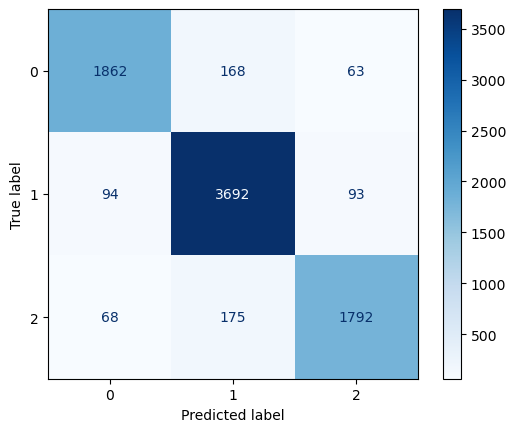

array([[1862,  168,   63],
       [  94, 3692,   93],
       [  68,  175, 1792]])

In [9]:
model.compute_confusion_matrix(x_test_tensor, y_test_tensor)